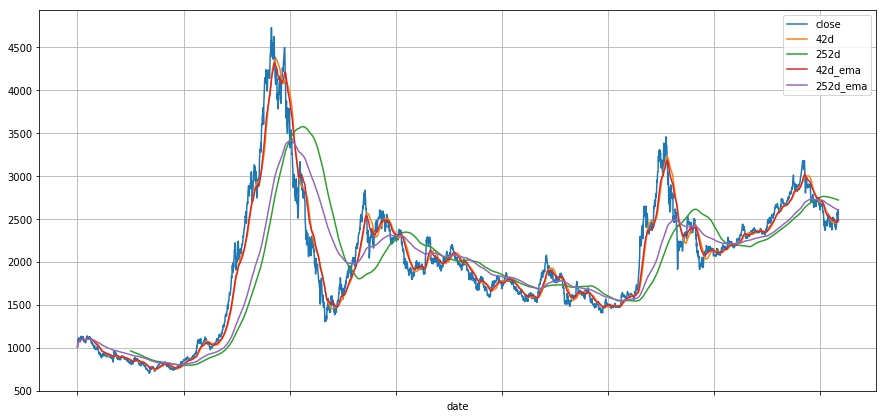

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts

sz50 = ts.get_k_data('sz50',start='2004-01-01')
#通过网络获取上证指数的历史数据,通过info方法查看数据的基本信息
sz50 = sz50.set_index('date')
sz50[:3]

#实现两个趋势策略,期间指数水平移动平均数,分别是两个月(42天),一年(252天).一年只有252个交易日
sz50['42d'] = np.round(sz50['close'].rolling(window= 42).mean(), 2)
sz50['42d_ema'] = np.round(sz50['close'].ewm(span= 42).mean(), 5)
sz50['252d'] = np.round(sz50['close'].rolling(window= 252).mean(), 2)
sz50['252d_ema'] = np.round(sz50['close'].ewm(span= 252).mean(), 5)
sz50.tail()

#基于这些数据,可以设计一些规则来生简单的成趋势信号
# 卖出信号
# 42天平均线第一次高于252天平均线SD(平均值差值的阈值)点
# 等待(持币)
# 42天平均线在252天平均线的+-SD点范围内
# 买入信号
#在sz50上添加一个新的列,两个平均数据的差值,'42-252',因为两个均值的区间不同,所以数量上是不相等的,缺失的部分为Nan
sz50['42-252'] = sz50['42d'] - sz50['252d']
sz50['42-252_ema'] = sz50['42d_ema'] - sz50['252d_ema']
sz50[['close','42d','252d','42-252','42d_ema','252d_ema','42-252_ema']].head()
sz50[['close','42d','252d','42-252','42d_ema','252d_ema','42-252_ema']].tail()
%matplotlib inline
sz50[['close','42d','252d','42d_ema','252d_ema']].plot(grid=True, figsize=(15,7))

In [7]:
from matplotlib.pylab import date2num
import datetime
 
# 对tushare获取到的数据转换成candlestick_ohlc()方法可读取的格式
data_list = []
for dates,row in hist_data.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(dates,'%Y-%m-%d')
    t = date2num(date_time)
    open,high,low,close = row[:4]
    datas = (t,open,high,low,close)
    data_list.append(datas)
# 创建子图
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
# 设置X轴刻度为日期时间
ax.xaxis_date()
plt.xticks(rotation=45)
plt.yticks()
plt.title("股票代码：601558两年K线图")
plt.xlabel("时间")
plt.ylabel("股价（元）")
mpf.candlestick_ohlc(ax,data_list,width=1.5,colorup='r',colordown='green')
plt.grid()

ModuleNotFoundError: No module named 'matplotlib.artist'